In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
# Create a StandardScaler instance to normalize the data
from sklearn.preprocessing import MinMaxScaler
import math
import itertools
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score, cohen_kappa_score, log_loss, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Classifiers
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
# from tensorflow.keras.models import Sequential
#from mlxtend.classifier import StackingCVClassifier 

# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras.layers import Dense

#preprocessing

from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [2]:
wcols = """duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level"""
cols=[]
for c in wcols.split(','):
    if(c.strip()):
       cols.append(c.strip())

In [4]:
# data_test=pd.read_csv(".\\KDDTest+.txt", names=cols)
data = pd.read_csv(".\\KDDTrain+.txt", names=cols)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print(data['label'].value_counts())
# print(data_test['label'].value_counts())


normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [ ]:
# data= pd.concat([data_train,data_test])

In [5]:
data.drop(['difficulty_level'],axis=1,inplace=True)
attack = {'normal': 'normal','apache2': 'Dos','back': 'Dos','land': 'Dos','neptune': 'Dos',
          'mailbomb': 'Dos','pod': 'Dos','processtable': 'Dos','smurf': 'Dos','teardrop': 'Dos',
          'udpstorm': 'Dos','worm': 'Dos','ftp_write': 'R2L','guess_passwd': 'R2L','httptunnel': 'R2L',
          'imap': 'R2L','multihop': 'R2L','named': 'R2L','phf': 'R2L','sendmail': 'R2L',
       'snmpgetattack': 'R2L','snmpguess': 'R2L','spy': 'R2L','warezclient': 'R2L','warezmaster': 'R2L',
       'xlock': 'R2L','xsnoop': 'R2L','ipsweep': 'Probe','mscan': 'Probe','nmap': 'Probe','portsweep': 'Probe',
       'saint': 'Probe','satan': 'Probe','buffer_overflow': 'U2R','loadmodule': 'U2R','perl': 'U2R','ps': 'U2R',
       'rootkit': 'U2R','sqlattack': 'U2R','xterm': 'U2R'}

In [6]:
data['label'] = data.label.apply(lambda r:attack[r[:]])
#data['State'] = data.label.apply(lambda r:result[r[:-1]])
#print(data.label.value_counts())
print(data['label'].value_counts())

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64


In [7]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
     # selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns     
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df
# calling the normalization() function
data = normalization(data.copy(),numeric_col)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.872361,-0.037694,1.602664,1.605104,-0.374362,-0.374432,-1.184947,-0.016930,-0.374560,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.725778,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095

In [8]:
data = data.dropna()
data= data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.872361,-0.037694,1.602664,1.605104,-0.374362,-0.374432,-1.184947,-0.016930,-0.374560,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
125960,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
125961,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.725778,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal
125962,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095

In [9]:
num_cols = data._get_numeric_data().columns
cate_cols = list(set(data.columns)-set(num_cols))
cate_cols.remove('label')
categorical = data[cate_cols]
categorical = pd.get_dummies(categorical,columns=cate_cols)
categorical

,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
125960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
125961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
125962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [10]:

# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.label)
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,0.872361,-0.037694,1.602664,1.605104,-0.374362,-0.374432,-1.184947,-0.016930,-0.374560,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
125960,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
125961,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,0.0,-0.002817,-0.097531,-0.725778,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal
125962,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095

In [11]:
label_=multi_data['label']

multi_data.drop('label', axis=1, inplace=True)
multi_data.drop('protocol_type', axis=1, inplace=True)
multi_data.drop('service', axis=1, inplace=True)
multi_data.drop('flag', axis=1, inplace=True)
multi_data.drop('num_outbound_cmds', axis=1, inplace=True)
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.872361,-0.037694,1.602664,1.605104,-0.374362,-0.374432,-1.184947,-0.016930,-0.374560,0.734343,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
125960,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
125961,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.725778,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387
125962,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.523041,-0.271739,1.602664,1.605104,-0.374362,-0.374432,-1.366922,-0.072389,-0.374560,0.734343,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-

In [12]:
multi_data=multi_data.join(categorical)
multi_data=multi_data.join(label_)
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,label
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,normal
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,normal
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,Dos
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,normal
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,

In [13]:
multi_data = multi_data.dropna()
multi_data= multi_data.drop_duplicates()
multi_data.shape

(125964, 122)

In [14]:
multi_data['label'].unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

In [15]:
############################################## NEWDF IS THE NEW DATASET with target, flag, service one hot encoded
# Rename every attack target: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.

labeldf=multi_data['label']

newlabeldf=labeldf.replace({'normal' : 0, 'Dos' : 1 ,'Probe' : 2,'R2L' : 3,'U2R' : 4})

# put the new label column back
multi_data['label'] = newlabeldf

print(multi_data['label'])

0         0
1         0
2         1
3         0
4         0
         ..
125959    1
125960    0
125961    0
125962    1
125963    0
Name: label, Length: 125964, dtype: int64


In [16]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = multi_data.corr()
# plt.figure(figsize=(15,12))
# sns.heatmap(corr)
# plt.show()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.4]
highest_corr.sort_values(ascending=True)

same_srv_rate             0.511072
service_http              0.511484
dst_host_same_srv_rate    0.526086
flag_SF                   0.548860
logged_in                 0.576013
dst_host_srv_count        0.624208
label                     1.000000
Name: label, dtype: float64

In [17]:
### SELECTING TOP 30 FEATURES ON BASIS OF CORELATION
highly_correlated = multi_data.corr().abs()['label'].sort_values(ascending=False)
highly_correlated[:30]

label                          1.000000
dst_host_srv_count             0.624208
logged_in                      0.576013
flag_SF                        0.548860
dst_host_same_srv_rate         0.526086
service_http                   0.511484
same_srv_rate                  0.511072
service_private                0.398993
dst_host_diff_srv_rate         0.391454
count                          0.388530
dst_host_srv_serror_rate       0.384951
dst_host_serror_rate           0.382275
serror_rate                    0.381803
srv_serror_rate                0.378824
flag_S0                        0.373701
service_eco_i                  0.338229
dst_host_same_src_port_rate    0.318826
dst_host_srv_rerror_rate       0.310331
srv_rerror_rate                0.310012
rerror_rate                    0.308771
dst_host_rerror_rate           0.293908
protocol_type_icmp             0.292514
diff_srv_rate                  0.282409
flag_RSTR                      0.256043
dst_host_srv_diff_host_rate    0.239725


In [18]:
list(highly_correlated[:30].index)

['label',
 'dst_host_srv_count',
 'logged_in',
 'flag_SF',
 'dst_host_same_srv_rate',
 'service_http',
 'same_srv_rate',
 'service_private',
 'dst_host_diff_srv_rate',
 'count',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'srv_serror_rate',
 'flag_S0',
 'service_eco_i',
 'dst_host_same_src_port_rate',
 'dst_host_srv_rerror_rate',
 'srv_rerror_rate',
 'rerror_rate',
 'dst_host_rerror_rate',
 'protocol_type_icmp',
 'diff_srv_rate',
 'flag_RSTR',
 'dst_host_srv_diff_host_rate',
 'service_domain_u',
 'flag_REJ',
 'dst_host_count',
 'service_smtp',
 'protocol_type_udp']

In [19]:
df_new = multi_data[list(highly_correlated[:30].index)]

In [20]:
df_new

,label,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag_S0,service_eco_i,dst_host_same_src_port_rate,dst_host_srv_rerror_rate,srv_rerror_rate,rerror_rate,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp
0,0,-0.818890,-0.809262,1,-0.782367,0,0.771283,0,-0.280282,-0.717045,-0.624871,-0.639532,-0.637209,-0.631929,0,0,0.069972,-0.376387,-0.374432,-0.374362,-0.224532,0,-0.349683,0,-0.289103,0,0,-0.324063,0,0
1,0,-1.035688,-0.809262,1,-1.161030,0,-1.321428,0,2.736852,-0.620982,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.367737,-0.376387,-0.374432,-0.374362,-0.387635,0,0.482201,0,-0.289103,0,0,0.734343,0,1
2,1,-0.809857,-0.809262,0,-0.938287,0,-1.389669,1,-0.174417,0.339648,1.618955,1.608759,1.602664,1.605104,1,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,0.038529,0,-0.289103,0,0,0.734343,0,0
3,0,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.690846,-0.602433,-0.572083,-0.189235,-0.184522,0,0,-0.383108,-0.345084,-0.374432,-0.374362,-0.387635,0,-0.349683,0,0.066252,0,0,-1.533670,0,0
4,0,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.472521,-0.624871,-0.639532,-0.637209,-0.631929,0,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,0.734343,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,1,-0.818890,-0.809262,0,-0.938287,0,-1.184947,1,-0.121485,0.872361,1.618955,1.608759,1.602664,1.605104,1,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.016930,0,-0.289103,0,0,0.734343,0,0
125960,0,1.159389,-0.809262,1,0.977304,0,0.771283,1,-0.386146,-0.717045,-0.624871,-0.639532,-0.637209,-0.631929,0,0,-0.447834,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,0.734343,0,1
125961,0,-0.773724,1.235694,1,-0.893738,0,0.771283,0,-0.121485,-0.725778,-0.624871,0.979238,-0.637209,-0.631929,0,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.355014,0,-0.349683,0,-0.289103,0,0,0.734343,1,0
125962,1,-0.972455,-0.809262,0,-1.094207,0,-1.366922,0,-0.174417,0.523041,1.618955,1.608759,1.602664,1.605104,1,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.072389,0,-0.289103,0,0,0.734343,0,0


In [ ]:
# df_new.to_csv('.\\dataset_merged.csv')

## SMOTE (Synthetic Minority Oversampling TEchnique) oversampling for imbalanced multi-class classification

Class=0, n=67343 (53.462%)
Class=1, n=45927 (36.460%)
Class=3, n=995 (0.790%)
Class=2, n=11647 (9.246%)
Class=4, n=52 (0.041%)


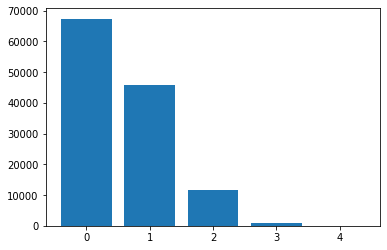

In [21]:

from collections import Counter

from sklearn.preprocessing import LabelEncoder

data = df_new.values
# split into input and output elements
# X, y = data[:, :-1], data[:, -1]
X = df_new.drop(columns = 'label')
y = df_new['label']

counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot original distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=67343 (20.000%)
Class=1, n=67343 (20.000%)
Class=3, n=67343 (20.000%)
Class=2, n=67343 (20.000%)
Class=4, n=67343 (20.000%)


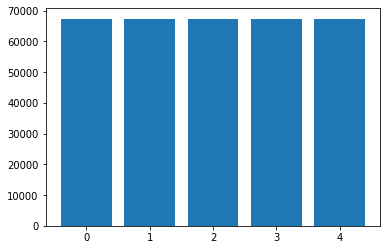

In [22]:
# SMOTE will oversample all classes to have the same number of examples as the class with the most examples
# example of oversampling a multi-class classification dataset

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder

# data = df.values
# split into input and output elements
# X, y = data[:, :-1], data[:, -1]
# label encode the target variable
# y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [29]:
col_name = list(df_new.columns)
del col_name[0]
len(col_name)

29

In [30]:
pd_x=pd.DataFrame(X,columns=col_name)
pd_x

,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag_S0,service_eco_i,dst_host_same_src_port_rate,dst_host_srv_rerror_rate,srv_rerror_rate,rerror_rate,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp
0,-0.818890,-0.809262,1,-0.782367,0,0.771283,0,-0.280282,-0.717045,-0.624871,-0.639532,-0.637209,-0.631929,0,0,0.069972,-0.376387,-0.374432,-0.374362,-0.224532,0,-0.349683,0,-0.289103,0,0,-0.324063,0,0
1,-1.035688,-0.809262,1,-1.161030,0,-1.321428,0,2.736852,-0.620982,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.367737,-0.376387,-0.374432,-0.374362,-0.387635,0,0.482201,0,-0.289103,0,0,0.734343,0,1
2,-0.809857,-0.809262,0,-0.938287,0,-1.389669,1,-0.174417,0.339648,1.618955,1.608759,1.602664,1.605104,1,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,0.038529,0,-0.289103,0,0,0.734343,0,0
3,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.690846,-0.602433,-0.572083,-0.189235,-0.184522,0,0,-0.383108,-0.345084,-0.374432,-0.374362,-0.387635,0,-0.349683,0,0.066252,0,0,-1.533670,0,0
4,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.472521,-0.624871,-0.639532,-0.637209,-0.631929,0,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,0.734343,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,-1.015837,1.235694,1,-1.125420,0,0.771283,0,-0.333214,-0.725778,-0.289010,-0.639532,-0.637209,-0.631929,0,0,-0.480197,0.092164,-0.374432,-0.374362,1.941299,0,-0.349683,0,-0.289103,0,0,0.734343,0,0
336711,-0.319219,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.709809,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.050515,0,0,-1.798343,0,0
336712,-1.035688,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.725778,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,-1.825991,0,0
336713,-1.019191,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.713438,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,-1.807583,0,0


In [35]:
pd_y=pd.DataFrame(y, columns=['label'])
pd_y

,label
0,0
1,0
2,1
3,0
4,0
...,...
336710,4
336711,4
336712,4
336713,4


In [36]:
df_final= pd_x.join(pd_y)

In [37]:
df_final

,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag_S0,service_eco_i,dst_host_same_src_port_rate,dst_host_srv_rerror_rate,srv_rerror_rate,rerror_rate,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp,label
0,-0.818890,-0.809262,1,-0.782367,0,0.771283,0,-0.280282,-0.717045,-0.624871,-0.639532,-0.637209,-0.631929,0,0,0.069972,-0.376387,-0.374432,-0.374362,-0.224532,0,-0.349683,0,-0.289103,0,0,-0.324063,0,0,0
1,-1.035688,-0.809262,1,-1.161030,0,-1.321428,0,2.736852,-0.620982,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.367737,-0.376387,-0.374432,-0.374362,-0.387635,0,0.482201,0,-0.289103,0,0,0.734343,0,1,0
2,-0.809857,-0.809262,0,-0.938287,0,-1.389669,1,-0.174417,0.339648,1.618955,1.608759,1.602664,1.605104,1,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,0.038529,0,-0.289103,0,0,0.734343,0,0,1
3,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.690846,-0.602433,-0.572083,-0.189235,-0.184522,0,0,-0.383108,-0.345084,-0.374432,-0.374362,-0.387635,0,-0.349683,0,0.066252,0,0,-1.533670,0,0,0
4,1.258754,1.235694,1,1.066401,1,0.771283,0,-0.439078,-0.472521,-0.624871,-0.639532,-0.637209,-0.631929,0,0,-0.480197,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,0.734343,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,-1.015837,1.235694,1,-1.125420,0,0.771283,0,-0.333214,-0.725778,-0.289010,-0.639532,-0.637209,-0.631929,0,0,-0.480197,0.092164,-0.374432,-0.374362,1.941299,0,-0.349683,0,-0.289103,0,0,0.734343,0,0,4
336711,-0.319219,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.709809,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.050515,0,0,-1.798343,0,0,4
336712,-1.035688,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.725778,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,-1.825991,0,0,4
336713,-1.019191,1.235694,1,1.066401,0,0.771283,0,-0.439078,-0.713438,-0.624871,-0.639532,-0.637209,-0.631929,0,0,2.756092,-0.376387,-0.374432,-0.374362,-0.387635,0,-0.349683,0,-0.289103,0,0,-1.807583,0,0,4


In [38]:
df_final.to_csv('.\\dataset_final.csv')